In [1]:
import numpy as np

import jax.numpy as jnp

from jax import config

config.update("jax_enable_x64", True)


from matplotlib import pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
klin, plin = np.loadtxt('Pk_Planck15_Table4.txt', unpack=True);

In [3]:
from transfer_functions import Zenbu

In [4]:
modPT = Zenbu(klin,plin)

In [5]:
D = 1
modPT.p_integrals(1.0, D)

DeviceArray([61.66000877, 70.61209097, 55.2259826 , 21.35075797], dtype=float64)

In [6]:
import time

t1 = time.time()
ptable = modPT.make_ptable(D)
t2 = time.time()

print(t2-t1)

2.082747220993042


In [7]:
from jax import jit

ptable_jit = jit(modPT.make_ptable)
ptable_jit(D)

t1 = time.time()
ptable = ptable_jit(D)
t2 = time.time()

print(t2-t1)

0.07080316543579102


(10.0, 30000.0)

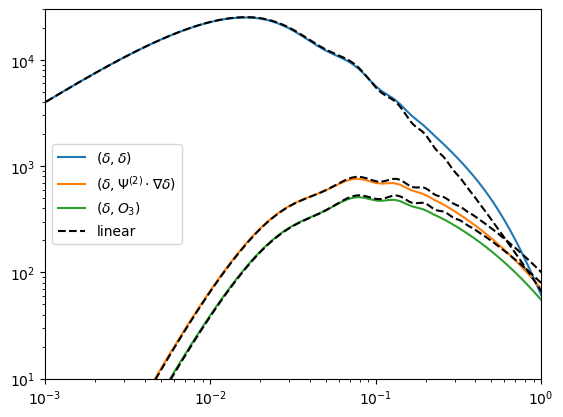

In [8]:
plt.loglog(ptable[:,0], ptable[:,1], label=r'$(\delta,\delta)$')
plt.loglog(ptable[:,0], ptable[:,2], label=r'$(\delta,\Psi^{(2)}\cdot\nabla\delta)$')
plt.loglog(ptable[:,0], ptable[:,3], label=r'$(\delta,O_3)$')

plt.loglog(modPT.qf.k, modPT.qf.p,'k--',label='linear')
plt.loglog(modPT.qf.k, modPT.qf.Rb3, 'k--')
plt.loglog(modPT.qf.k, 3./7*(modPT.qf.R1 + modPT.qf.R2), 'k--')

plt.legend()

plt.xlim(1e-3,1)
plt.ylim(1e1,3e4)